In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [36]:
def my_softmax(z):
    ez = np.exp(z)
    softmax = ez / np.sum(ez)
    return softmax

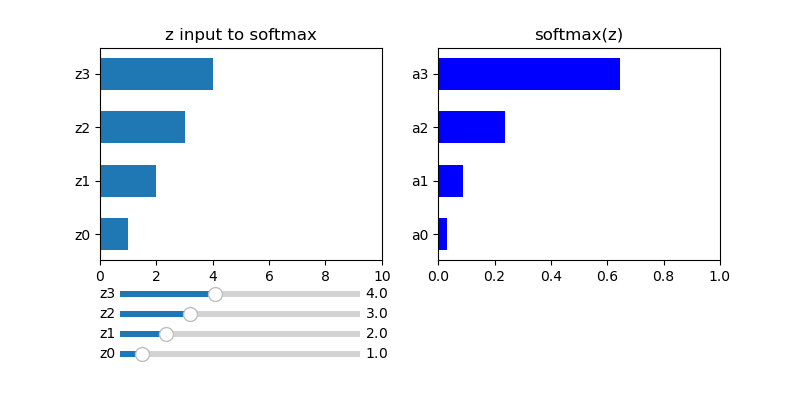

In [37]:
def plt_softmax(my_softmax):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    plt.subplots_adjust(bottom=0.35)

    axz0 = fig.add_axes([0.15, 0.10, 0.30, 0.03]) # [left, bottom, width, height]
    axz1 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axz2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axz3 = fig.add_axes([0.15, 0.25, 0.30, 0.03])

    z3 = Slider(axz3, 'z3', 0.1, 10.0, valinit=4, valstep=0.1)
    z2 = Slider(axz2, 'z2', 0.1, 10.0, valinit=3, valstep=0.1)
    z1 = Slider(axz1, 'z1', 0.1, 10.0, valinit=2, valstep=0.1)
    z0 = Slider(axz0, 'z0', 0.1, 10.0, valinit=1, valstep=0.1)

    z = np.array(['z0','z1','z2','z3'])
    bar = ax[0].barh(z, height=0.6, width=[z0.val,z1.val,z2.val,z3.val], left=None, align='center')
    bars = bar.get_children()
    ax[0].set_xlim([0,10])
    ax[0].set_title("z input to softmax")

    a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
    anames = np.array(['a0','a1','a2','a3'])
    sbar = ax[1].barh(anames, height=0.6, width=a, left=None, align='center',color='blue')
    sbars = sbar.get_children()
    ax[1].set_xlim([0,1])
    ax[1].set_title("softmax(z)")

    def update(val):
        bars[0].set_width(z0.val)
        bars[1].set_width(z1.val)
        bars[2].set_width(z2.val)
        bars[3].set_width(z3.val)
        a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
        sbars[0].set_width(a[0])
        sbars[1].set_width(a[1])
        sbars[2].set_width(a[2])
        sbars[3].set_width(a[3])

        fig.canvas.draw_idle()

    z0.on_changed(update)
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)

    plt.show()
 

plt.close("all")
plt_softmax(my_softmax)

##### Prepare sythetic data using sklearn library's make_blob

In [108]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=1000, centers=centers, cluster_std=1.0,random_state=30)

shape of X = (1000, 2)
shape of y = (1000,)
unique labels = [0 1 2 3]


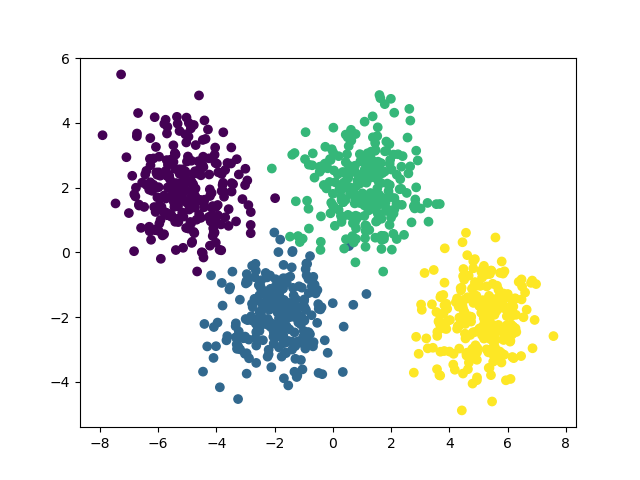

In [109]:
print(f"shape of X = {X_train.shape}")
print(f"shape of y = {y_train.shape}")
print(f"unique labels = {np.unique(y_train)}")
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=y_train)

#### Train the tensorflow model

In [110]:
model = Sequential (
    layers = [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001)    
)

model.fit(
    X_train, 
    y_train,
    epochs=10
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - loss: 1.5746
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.8940
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.5994
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.4365
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.3264
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.2523
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.1837
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.1612
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.1174
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0859


#### Verify the output of the model by making predictions

In [111]:
p_non_preferred = model.predict(X_train)
print(f"shape of p_non_preferred = {p_non_preferred.shape}")
print(f"First 10 predictions = {p_non_preferred[:10]}")

#Print the first 10 predictions in a formatted way
formatted_array = np.array2string(
    p_non_preferred[:10], 
    formatter= {'float_kind':lambda x: f"{x:.2f}"}, 
    precision=2, 
    separator=',', suppress_small=False)
print(f"First 10 predictions in formatted way = {formatted_array}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
shape of p_non_preferred = (1000, 4)
First 10 predictions = [[4.7977e-03 9.3426e-01 5.3079e-02 7.8644e-03]
 [3.7842e-04 1.1979e-03 1.0483e-03 9.9738e-01]
 [7.9776e-03 9.2124e-01 5.7541e-02 1.3245e-02]
 [4.6140e-04 9.8300e-01 1.5509e-02 1.0312e-03]
 [9.7673e-01 2.3498e-04 2.0430e-02 2.6080e-03]
 [6.7682e-04 9.8366e-01 1.3943e-02 1.7196e-03]
 [1.7581e-03 7.8861e-03 3.9928e-03 9.8636e-01]
 [1.1796e-03 9.7773e-01 1.8232e-02 2.8575e-03]
 [1.8896e-02 5.8815e-03 9.7347e-01 1.7551e-03]
 [1.1256e-05 1.8880e-05 6.7258e-05 9.9990e-01]]
First 10 predictions in formatted way = [[0.00,0.93,0.05,0.01],
 [0.00,0.00,0.00,1.00],
 [0.01,0.92,0.06,0.01],
 [0.00,0.98,0.02,0.00],
 [0.98,0.00,0.02,0.00],
 [0.00,0.98,0.01,0.00],
 [0.00,0.01,0.00,0.99],
 [0.00,0.98,0.02,0.00],
 [0.02,0.01,0.97,0.00],
 [0.00,0.00,0.00,1.00]]


#### Make the predictions 

In [112]:
#Print value of y_train along with p_non_preferred
print(f"Shape of p_non_preferred = {p_non_preferred.shape}")
print(f"smallest value in p_non_preferred = {np.min(p_non_preferred):.2f}")
print(f"largest value in p_non_preferred = {np.max(p_non_preferred):.2f}")

y_pred = np.argmax(p_non_preferred, axis=1)
print(f"shape of y_pred = {y_pred.shape}")

#Print y_train along with y_pred side by side
print(f"p_non_preferred = {p_non_preferred[:10]}")
print(f"y_train = {y_train[:10]}")
print(f"y_pred = {y_pred[:10]}")

print(p_non_preferred)

Shape of p_non_preferred = (1000, 4)
smallest value in p_non_preferred = 0.00
largest value in p_non_preferred = 1.00
shape of y_pred = (1000,)
p_non_preferred = [[4.7977e-03 9.3426e-01 5.3079e-02 7.8644e-03]
 [3.7842e-04 1.1979e-03 1.0483e-03 9.9738e-01]
 [7.9776e-03 9.2124e-01 5.7541e-02 1.3245e-02]
 [4.6140e-04 9.8300e-01 1.5509e-02 1.0312e-03]
 [9.7673e-01 2.3498e-04 2.0430e-02 2.6080e-03]
 [6.7682e-04 9.8366e-01 1.3943e-02 1.7196e-03]
 [1.7581e-03 7.8861e-03 3.9928e-03 9.8636e-01]
 [1.1796e-03 9.7773e-01 1.8232e-02 2.8575e-03]
 [1.8896e-02 5.8815e-03 9.7347e-01 1.7551e-03]
 [1.1256e-05 1.8880e-05 6.7258e-05 9.9990e-01]]
y_train = [1 3 1 1 0 1 3 1 2 3]
y_pred = [1 3 1 1 0 1 3 1 2 3]
[[4.7977e-03 9.3426e-01 5.3079e-02 7.8644e-03]
 [3.7842e-04 1.1979e-03 1.0483e-03 9.9738e-01]
 [7.9776e-03 9.2124e-01 5.7541e-02 1.3245e-02]
 ...
 [1.3039e-02 8.8279e-01 8.5215e-02 1.8952e-02]
 [6.1092e-04 1.8924e-03 1.8198e-03 9.9568e-01]
 [5.4364e-04 1.0282e-03 2.4779e-03 9.9595e-01]]


#### Plot the prediction

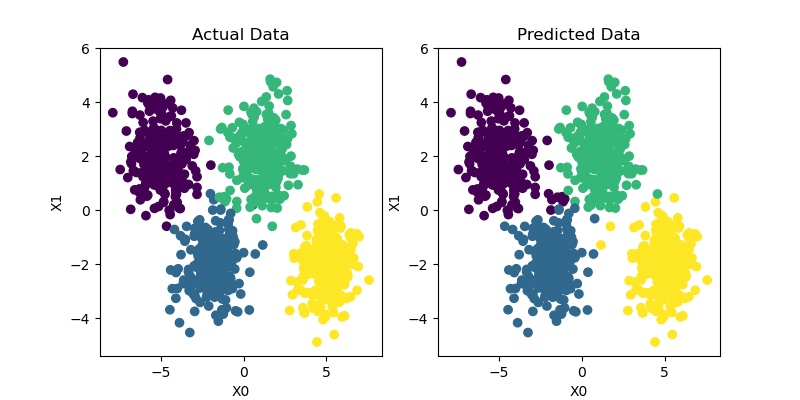

In [114]:
def plot_softmax(X_train, prediction):
    fig, ax = plt.subplots(1,2, figsize=(8, 4))

    #Plot the actual data
    ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
    ax[0].set_title("Actual Data")
    ax[0].set_xlabel("X0")
    ax[0].set_ylabel("X1")

    #Plot the predicted data
    ax[1].scatter(X_train[:,0], X_train[:,1], c=np.argmax(prediction, axis=1))
    ax[1].set_title("Predicted Data")
    ax[1].set_xlabel("X0")
    ax[1].set_ylabel("X1")

plot_softmax(X_train, p_non_preferred)


#### Lets take more accurate version for predicting softmax values

In [115]:
model = Sequential (
    layers = [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train,
    y_train,
    epochs=10
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 2.1087
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.1069
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.6934
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.5083
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.3697
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2559
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1886
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.1307
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0902
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0815


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
[[ 0.141   3.8846  0.076  -0.5185]
 [-2.8648 -2.1829 -3.4394  2.6184]
 [-0.0428  3.1868  0.068  -0.3479]
 [ 0.3877  5.6902 -0.1714 -0.7968]
 [ 4.9122 -0.8638 -1.8146 -2.2538]
 [ 0.1221  4.9382 -0.2797 -0.4964]
 [-2.283  -1.3911 -2.7147  2.1222]
 [ 0.0519  4.473  -0.2512 -0.4154]
 [-1.3107 -0.155   3.9859 -0.6604]
 [-4.273  -3.7356 -4.811   3.7298]]


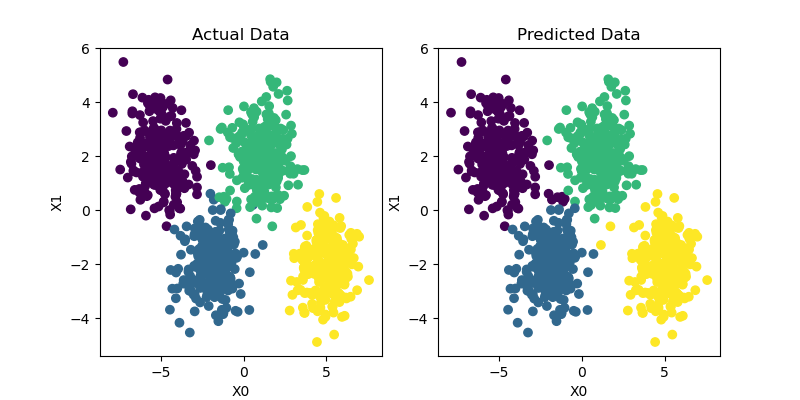

In [118]:
p_preferred = model.predict(X_train)

print(p_preferred[:10])
plot_softmax(X_train, p_preferred)

In [119]:
print(f"smallest value in preferred predictions = {np.min(p_preferred):.2f} and largest = {np.max(p_preferred):.2f}")

smallest value in preferred predictions = -4.99 and largest = 8.67
